## Описание проекта

Цель проекта:  сформировать прогноз продаж, чтобы сделать ставку на потенциально популярные игры у пользователей и спланировать рекламные компании на 2017 год.

Для интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры, нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й год . Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).


**Описание данных:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации

**Импортируем библиотеки**

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st

**Получим общую информацию о наших данных**

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Получим первые 15 строк таблицы**

In [3]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Посчитаем количество пустых значений**

In [4]:
for item in data.columns: print('В столбце', item, 'пропусков:', data[item].isna().sum())

В столбце Name пропусков: 2
В столбце Platform пропусков: 0
В столбце Year_of_Release пропусков: 269
В столбце Genre пропусков: 2
В столбце NA_sales пропусков: 0
В столбце EU_sales пропусков: 0
В столбце JP_sales пропусков: 0
В столбце Other_sales пропусков: 0
В столбце Critic_Score пропусков: 8578
В столбце User_Score пропусков: 6701
В столбце Rating пропусков: 6766


**Выведем процент пропусков по колонкам**

In [5]:
pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


**Посчитаем количество дубликатов**

In [6]:
print('Количество дубликатов: {}'.format(data.duplicated().sum()))

Количество дубликатов: 0


**Вывод**

В наших данных нет дубликатов, но присутствуют пропуски в столбцах:
* Name (название игры);
* Year_of_Release (год выпуска);
* Genre (жанр игры);
* Critic_Score (оценка критиков);
* User_Score (оценка пользователей);
* Rating (рейтинг от организации ESRB).

Необходимо изменить типы данных в следующих столбцах:
* year_of_release (год выпуска);
* user_score (оценка пользователей).

А также заменить названия столбцов (привести к нижнему регистру).

## Предобработка данных

**Заменим названия столбцов (приведем к нижнему регистру)**

In [7]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 
                'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Преобразуем данные в нужные типы**
* year_of_release (год выпуска): на целочисленный;
* user_score (оценка пользователей): на вещественный. 

**Изменим тип данных и удалим пропущенные значения в переменной year_of_release**

В столбце пропущено 269 значений (доля таких значений равна 1.6), поэтому удалим их, так как с абсолютной точностью восстановить данные сейчас невозможно

In [8]:
# изменим тип данных в столбце year_of_release 
data['year_of_release'] = data['year_of_release'].astype('Int64')

# удалим пропущенные значения
data.dropna(subset = ['year_of_release'], inplace = True)

**Удалим две строки с пропущенными названиями игр**

In [9]:
data.dropna(subset=['name'], inplace=True)

for item in data.columns: print('В столбце', item, 'пропусков:', data[item].isna().sum())

В столбце name пропусков: 0
В столбце platform пропусков: 0
В столбце year_of_release пропусков: 0
В столбце genre пропусков: 0
В столбце na_sales пропусков: 0
В столбце eu_sales пропусков: 0
В столбце jp_sales пропусков: 0
В столбце other_sales пропусков: 0
В столбце critic_score пропусков: 8461
В столбце user_score пропусков: 6605
В столбце rating пропусков: 6676


**Аббревиатура tbd в столбце с рейтингом пользователей расшифровывается как "To Be Determined", то есть "будет определено"**.
Скорей всего, эти данные были нарочно не заполнены, так как пока нет возможности определить рейтинг, поэтому заменим tbd на Nan

In [10]:
# заменим tbd на Nan
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

# поменяем формат столбца user_score на float
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**В колонке rating заменим Nan на undefined**

In [11]:
data['rating'] = data['rating'].replace(np.nan,'undefined', regex=True)

**Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец**

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Вывод**

Таким образом, мы сделали следующее:
* заменили названия столбцов (привели к нижнему регистру);
* преобразовали данные в нужные типы в переменных year_of_release (год выпуска) и user_score (оценка пользователей);
* обработали пропущенные значения в названии игры (удалили 2 строки, так как они не несут никакой смысловой нагрузки), в переменной год выпуска (удалили 269 значений, так как с абсолютной точностью восстановить эти данные невозможно);
* в столбцах critic_score (оценка критиков), user_score(оценка пользователей) и rating (рейтинг от организации ESRB) пропущенных значений слишком много и нет возможности заполнить их достовернымиданными или, например, медианами значениями, чтобы это не привело к смещению, поэтому оставили данные как есть;
* обратили внимание на аббревиатуру tbd в столбце с рейтингом, которая расшифровывается как "To Be Determined", то есть "будет определено". Предположили, что эти данные были нарочно не заполнены, так как пока нет возможности определить рейтинг, поэтому заменили tbd на Nan;
* посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.

## Исследовательский анализ данных

**Посмотрим сколько игр выпускалось в разные годы и важны ли данные за все периоды**

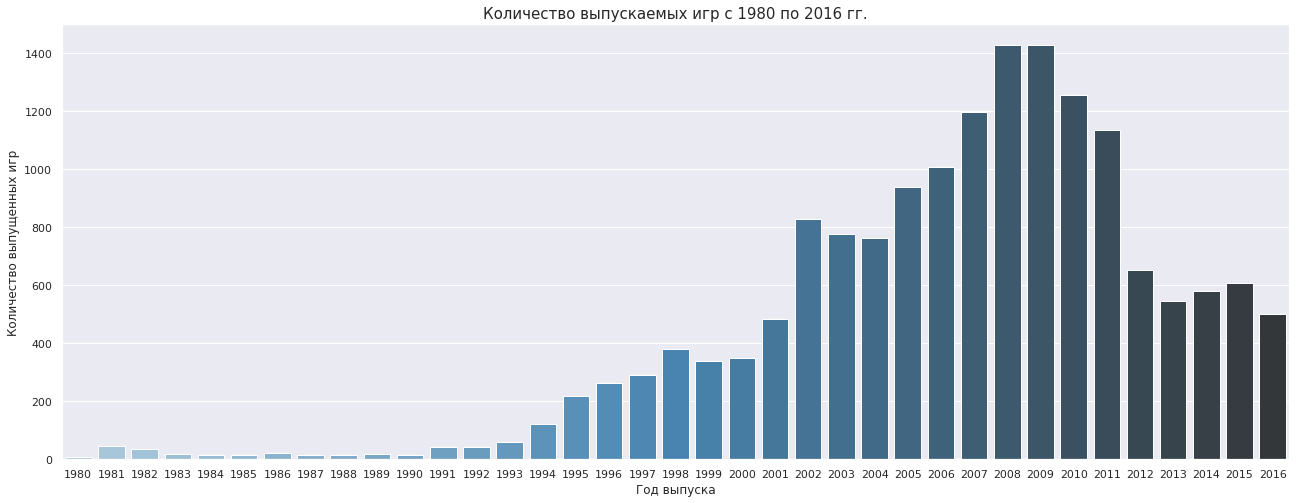

In [13]:
# сводная таблица
games_for_the_period = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_for_the_period.columns = ['count']

# построим график по количеству выпускаемых игр
f, ax = plt.subplots(figsize=(22, 8))
ax = sns.barplot(x=games_for_the_period.index, y='count', data=games_for_the_period, palette='Blues_d')
plt.title('Количество выпускаемых игр с 1980 по 2016 гг.', fontsize=15)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество выпущенных игр', fontsize=12)
plt.show()

Из графика видно, что до 1994 года  компьютерных игр выходило крайне мало. Количество выпускаемых компьютерных игр заметно растет с 1994 года по 2008 год, затем после 2009 года наблюдается спад. Скорей всего, этот спад может быть связан с распространением игр на мобильных телефоннах. При этом для прогноза более актуальны для нас данные за последние 4 года, то есть с 2013 по 2016 гг.

**Посмотрим какие платформы лидируют по продажам за весь период**

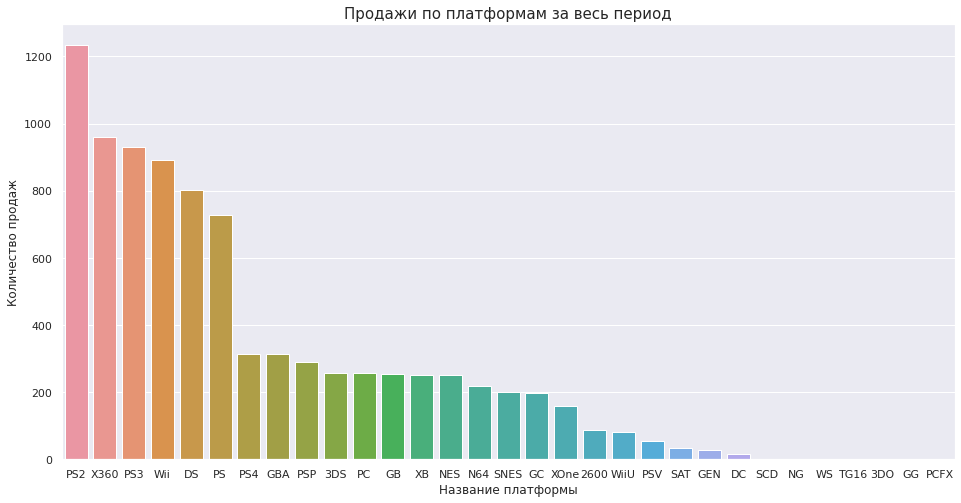

In [14]:
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform['total_sales'])
plt.title('Продажи по платформам за весь период', fontsize=15)
plt.xlabel('Название платформы', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.show()

Из графика видно, что самые продаваемые игровые платформы за весь период: PlayStation 2, Xbox 360, PlayStation 3, Wii, DS, PlayStation.

**Возьмём за актуальный период данные с 2013 года**

In [15]:
data_relevant=data.query('year_of_release >= 2013')

**Выведем топ-5 платформ с максимальными продажами**

In [16]:
top5 = data_relevant.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(5, 'total_sales')
top5

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


К лидерам по продажам за актуальный период можно отнести: PlayStation 4, PlayStation 3, Xbox One, Nintendo 3DS и Xbox 360.

**Посмотрим какие платформы лидируют по продажам (растут или падают)**

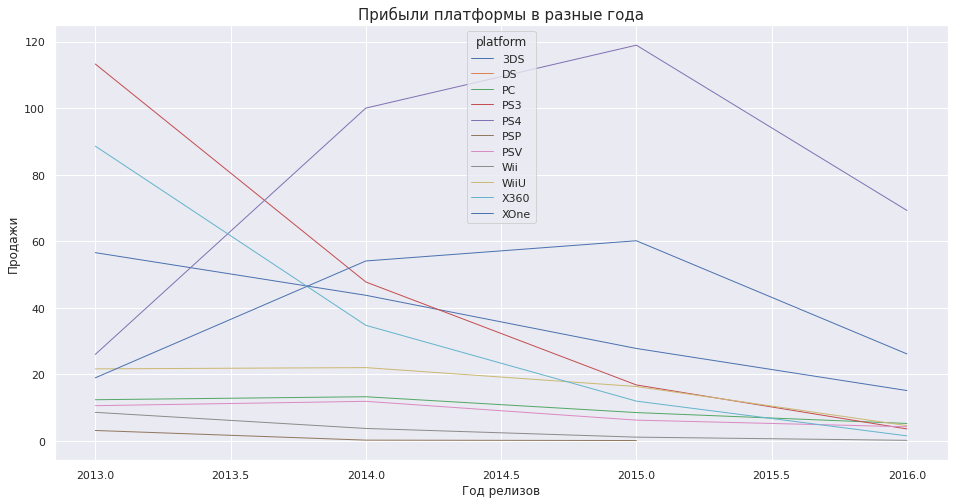

In [17]:
pd.pivot_table(data_relevant, index='year_of_release', columns='platform', values='total_sales',
        aggfunc='sum').plot(grid=True, figsize = (16,8), linewidth=1, alpha=1)
plt.title('Прибыли платформы в разные года', fontsize=15)
plt.xlabel('Год релизов', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()

По графику видно, что в активной фазе пока ещё платформы PlayStation 4, Xbox One и Nintendo 3DS (хотя есть общая тенценция на спад с 2015 года), в то время как лидеры продаж 2013 года: PlayStation 3 и Xbox 360 уже к 2015-2016 гг. совсем утратили свой коммерческий потенциал.

**Посмотрим за какой характерный срок появляются новые и исчезают старые платформы**

Найдем среднюю продолжительность жизни игровой платформы

In [18]:
period = data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
period.fillna(0, inplace=True)

,active_years
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


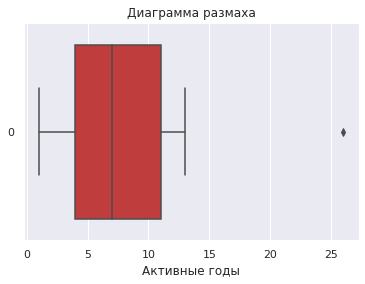

In [19]:
notnull=[]
for platform in period.columns:
    notnull.append(period[platform].ne(0).value_counts().loc[period[platform].ne(0).value_counts().index == True].values[0])

# построим диаграмму размаха для продолжительности жизни игровых платформ
_ = sns.boxplot(data=notnull, orient='h', color='tab:red')
plt.title('Диаграмма размаха')
plt.xlabel('Активные годы')

# числовое описание
notnull = pd.DataFrame(notnull, columns=['active_years'])
notnull.describe()

Cредняя продолжительность жизни игровой платформы, в течение которого она приносит деньги, составляет 8 лет.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

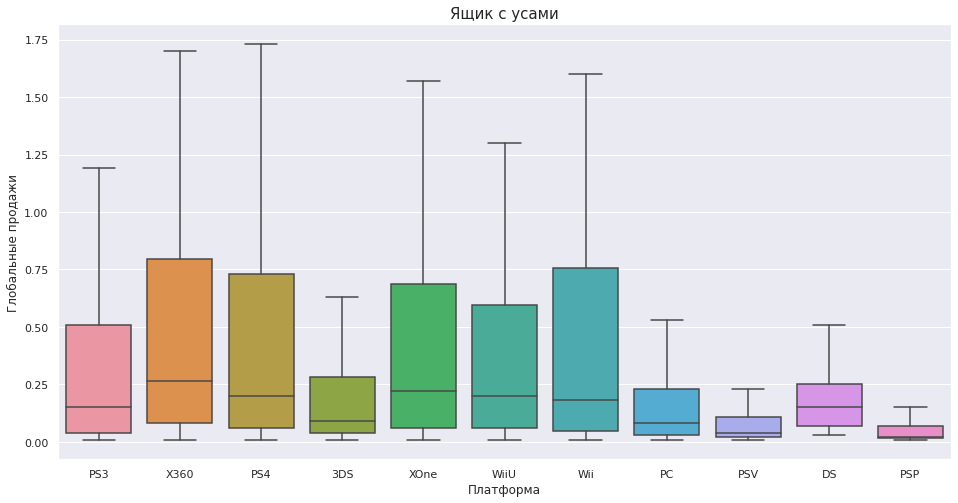

In [20]:
sns.set(rc={'figure.figsize':(16,8)})
g=sns.boxplot(x='platform',y='total_sales',data=data_relevant, showfliers = False);
plt.title('Ящик с усами', fontsize=15);
plt.xlabel('Платформа', fontsize=12);
plt.ylabel('Глобальные продажи', fontsize=12);

У таких платформ как PlayStation 4, Xbox One и Nintendo 3DS,  большая часть значений больше медианного. Наиболее равномерно среди всех платформ значения распределены только у платформы Nintendo DS.

**Сохраним в переменной data_top_5 топ-5 платформ**

In [21]:
list_of_top5 = ['PS4','X360','PS3','XOne','3DS']
data_top_5 = data[data['platform'].isin(['PS4','X360','PS3','XOne','3DS'])]
data_top_5 = data_top_5[data_top_5['total_sales']<1.4]

data_top_5['total_sales'].describe()

count    3239.000000
mean        0.319546
std         0.329381
min         0.000000
25%         0.080000
50%         0.190000
75%         0.470000
max         1.390000
Name: total_sales, dtype: float64

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по топ-5 платформама**

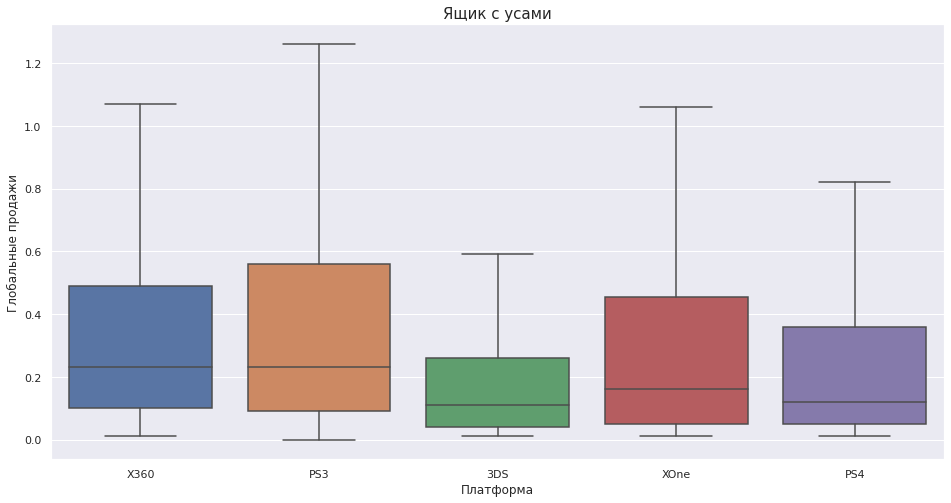

In [22]:
# нарисуем ящики с усами 
plt.figure(figsize=(16,8))
sns.boxplot(data=data_top_5, x='platform', y='total_sales', showfliers = False)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи', fontsize=12)
plt.show()

Исходя из графиков видно, у всех платформ в топ-5 большая часть значений больше медианного.

**Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков**

**Посмотрим корреляцию между отзывами пользователей и продажами**

In [23]:
play_station_4 = data[data['platform']=='PS4']
play_station_4['user_score'].corr(play_station_4['total_sales'])

-0.031957110204556376

Корреляция между отзывами пользователей и продажами: -0.03, то есть слабая обратная зависимость.

**Построим диаграмму рассеяния по оценкам пользователей**

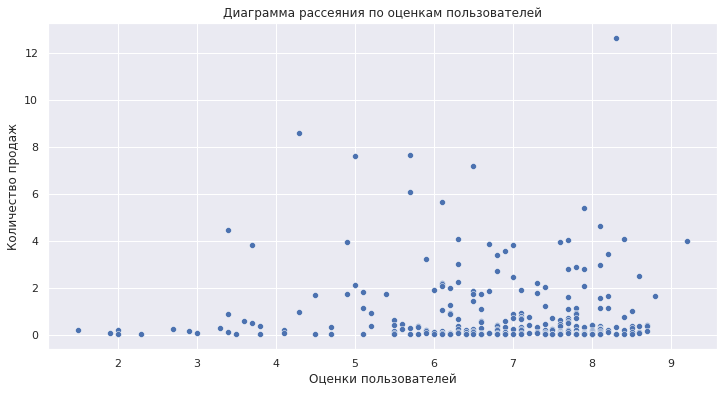

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=play_station_4)
plt.title('Диаграмма рассеяния по оценкам пользователей')
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество продаж')
plt.show()

**Посмотрим корреляция между отзывами критиков и продажами**

In [25]:
play_station_4['critic_score'].corr(play_station_4['total_sales'])

0.40656790206178095

Корреляция между отзывами критиков и продажами: 0.406, то есть умеренная зависимость. Некоторые люди доверяют мнению критиков и покупают игру, особенно если рейтинг высокий.

**Построим диаграмму рассеяния по оценкам критиков**

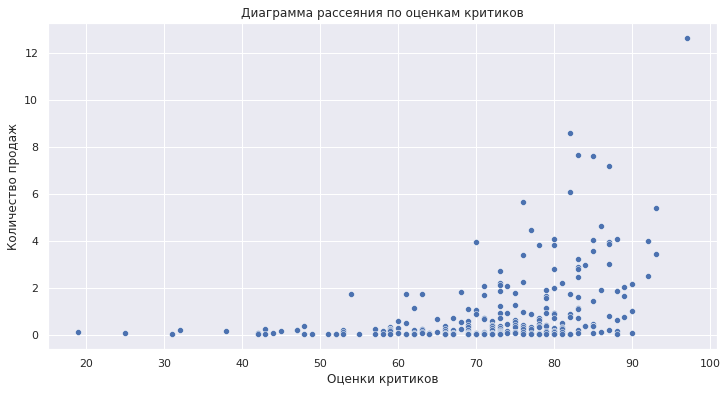

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=play_station_4)
plt.title('Диаграмма рассеяния по оценкам критиков')
plt.xlabel('Оценки критиков')
plt.ylabel('Количество продаж')
plt.show()

**Чтобы соотнести с другими платформами запишем функцию, которая будет рисовать диаграммы рассеяния и считать корреляции**

In [27]:
def other_platform_matrix(name_of_platform):
    platform = data[data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(title='Диаграмма рассеяния по оценкам пользователей')
    ax[1].set(title='Диаграмма рассеяния по оценкам критиков')
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
        
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), 'слабая:', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), 'умеренная:', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), 'высокая:', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), 'весьма высокая:', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и продажами', name_of_platform.upper(), 'сильная:', critic_correl)
    
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), 'слабая:', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), 'умеренная:', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), 'высокая:', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), 'весьма высокая:', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами', name_of_platform.upper(), 'сильная:', correl)
    print('\n')

**Выведем все графики**

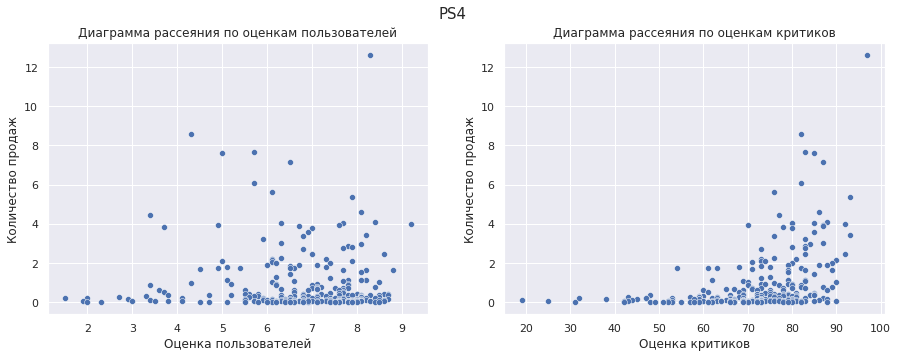

Корреляция между отзывами критиков и продажами PS4 умеренная: 0.40656790206178095




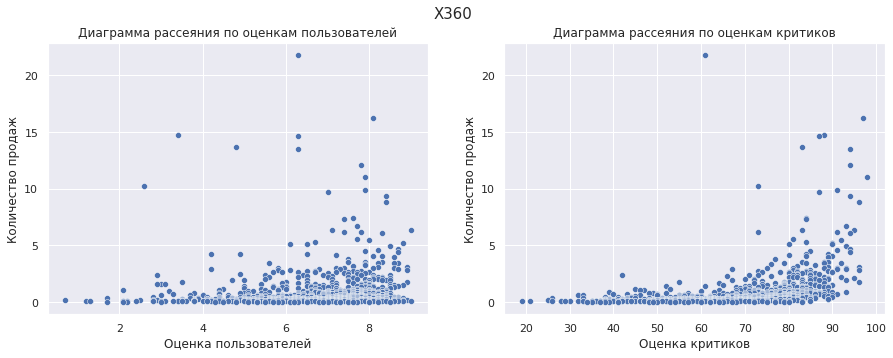

Корреляция между отзывами критиков и продажами X360 умеренная: 0.39286589254006954
Корреляция между отзывами пользователей и продажами X360 слабая: 0.11418661214018049




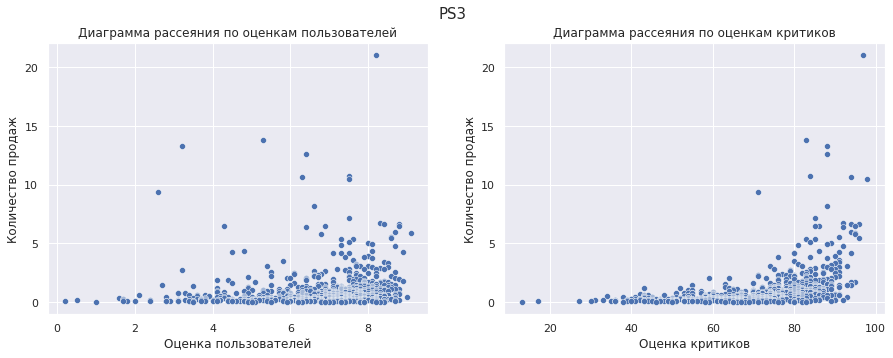

Корреляция между отзывами критиков и продажами PS3 умеренная: 0.4327589578997135
Корреляция между отзывами пользователей и продажами PS3 слабая: 0.12841562938563006




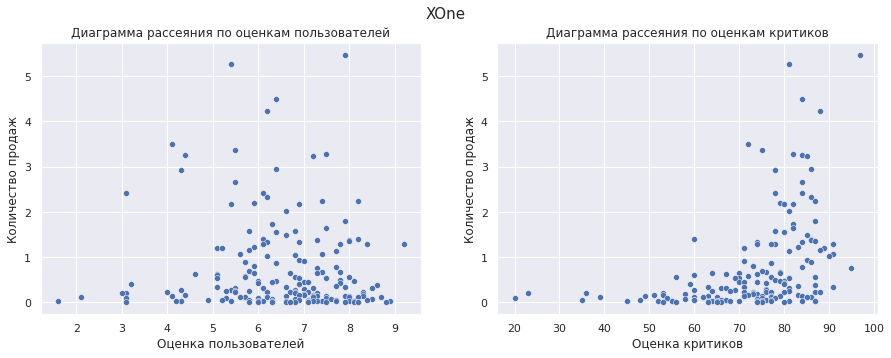

Корреляция между отзывами критиков и продажами XONE умеренная: 0.4169983280084017




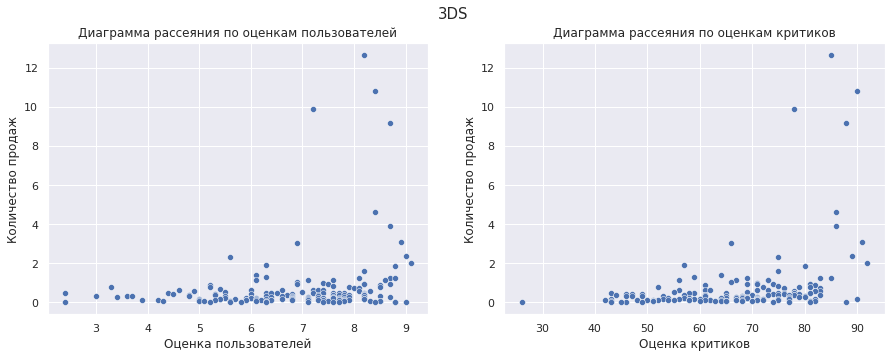

Корреляция между отзывами критиков и продажами 3DS умеренная: 0.3487397305984834
Корреляция между отзывами пользователей и продажами 3DS слабая: 0.22207843643390882




In [28]:
for platform in list_of_top5:
    other_platform_matrix(platform)

Для PlayStation 4:
* Корреляция между отзывами критиков и продажами PlayStation 4 умеренная положительная: 0.406
* Корреляция между отзывами пользователей и продажами PlayStation 4 слабая отрицательная: -0.03

Для X360:
* Корреляция между отзывами критиков и продажами X360 умеренная положительная: 0.392
* Корреляция между отзывами пользователей и продажами X360 слабая положительная: 0.114

Для PlayStation 3:
* Корреляция между отзывами критиков и продажами PlayStation 3 умеренная положительная: 0.432
* Корреляция между отзывами пользователей и продажами PlayStation 3 слабая положительная: 0.128

Для Xbox One:
* Корреляция между отзывами критиков и продажами Xbox One умеренная положительная: 0.416
* Корреляция между отзывами пользователей и продажами Xbox One слабая отрицательная: -0.068

Для Nintendo 3DS:
* Корреляция между отзывами критиков и продажами Nintendo 3DS умеренная положительная: 0.348
* Корреляция между отзывами пользователей и продажами Nintendo 3DS слабая положительная: 0.222

Как мы видим, везде наблюдается умеренная положительная корреляция между отзывами критиков и продажами, в тоже время наблюдается слабая положительная (X360, PlayStation 3, Nintendo 3DS) и отрицательная корреляция (PlayStation 4, Xbox One) между оценками других пользователей и продажами, то есть, как правило, люди в большей степени доверяют мнению критиков, чем пользователей, и покупают игры, особенно если рейтинг высокий.

**Посмотрим на общее распределение игр по жанрам. Отсортируем их по убыванию**

In [29]:
distr_genre = data_relevant.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


**Представим распределение игр по жанрам на графике**

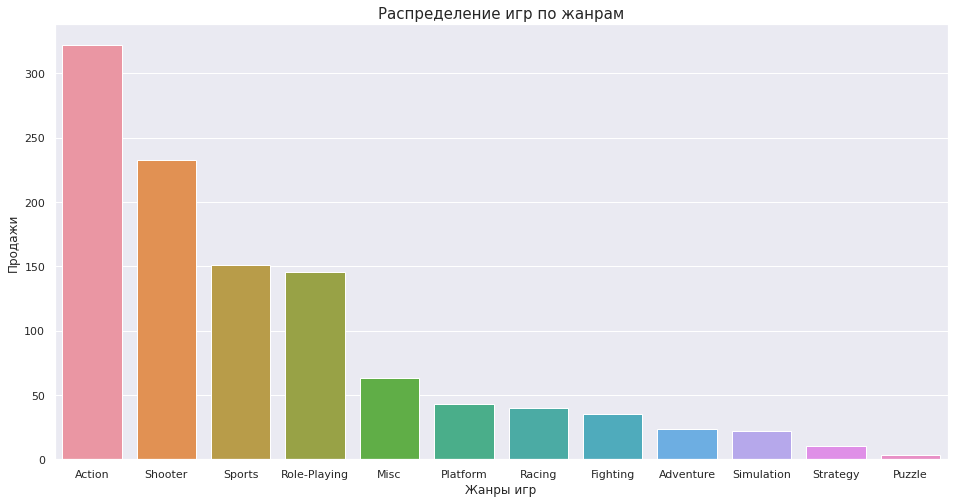

In [30]:
plt.figure(figsize=(16,8))
plt.title('Распределение игр по жанрам', fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.show()

Лучше всего продаются игры таких жанров как: action (экшен), shooter (шутер), sports (спортивные), ниже всего продажи у игр с жанром puzzle (головоломки).

**Кроме суммарных продаж посмотрим медианные**

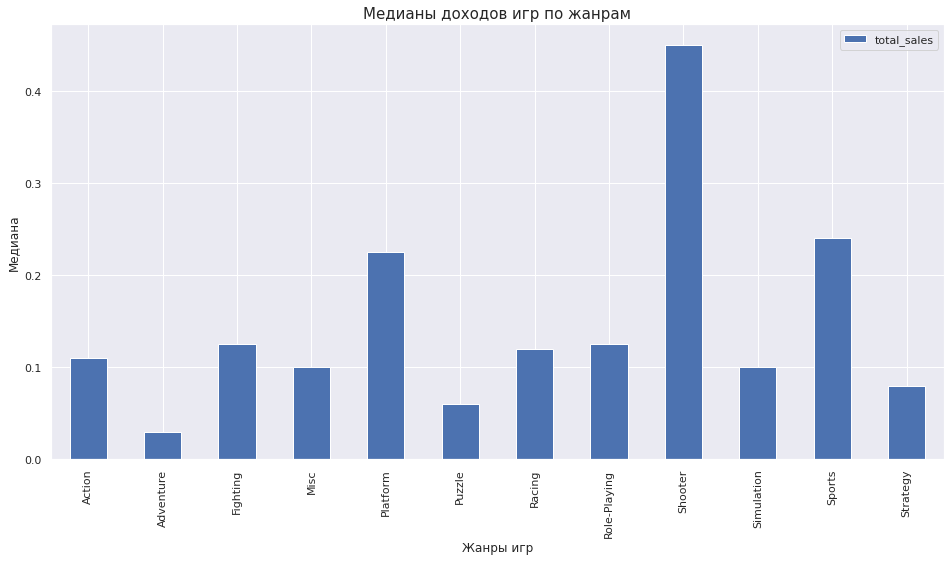

In [31]:
df = data_relevant.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum','median'])
df['median'].plot(kind='bar');
plt.title('Медианы доходов игр по жанрам', fontsize=15);
plt.xlabel('Жанры игр', fontsize=12)
plt.ylabel('Медиана', fontsize=12)
plt.show()

Таким образом, действительно мы видим, что лидеры по жанру изменились, теперь это: shooter (шутер), platform (платформер), sports (спортивные), role-playing (ролевая) и racing (гонки).

**Вывод**
* До 1994 года компьютерных игр выходило крайне мало. Количество выпускаемых компьютерных игр заметно растет с 1994 года по 2008 год, затем после 2009 года наблюдается спад. Скорей всего, этот спад может быть связан с распространением игр на мобильных телефоннах. При этом для прогноза более актуальны для нас данные за последние 4 года, то есть с 2013 по 2016 гг.
* Самые популярные игровые платформы за весь период: PlayStation 2, Xbox 360, PlayStation 3, Wii, DS, PlayStation. 
* С 2013 г. по продажам лидируют: PlayStation 4, PlayStation 3, Xbox One, Nintendo 3DS и Xbox 360.  В этот период в активной фазе пока ещё платформы PlayStation 4, Xbox One и Nintendo 3DS (хотя есть общая тенценция на спад с 2015 года), в то время как лидеры продаж 2013 года: PlayStation 3 и Xbox 360 уже к 2015-2016 гг. совсем утратили свой коммерческий потенциал.
* Cредняя продолжительность жизни игровой платформы, в течение которого она приносит деньги, составляет 8 лет.
* По глобальным продажам игр у таких платформ как PlayStation 4, Xbox One и Nintendo 3DS, большая часть значений больше медианного. Наиболее равномерно среди всех платформ значения распределены только у платформы Nintendo DS.
* Везде наблюдается умеренная положительная корреляция между отзывами критиков и продажами, в тоже время наблюдается слабая положительная (X360, PlayStation 3, Nintendo 3DS) и отрицательная корреляция (PlayStation 4, Xbox One) между оценками других пользователей и продажами, то есть, как правило, люди в большей степени доверяют мнению критиков, чем пользователей, и покупают игры, особенно если рейтинг высокий. Поэтому для определения прибыльной игры следует учитывать отзывы критиков. 
* При этом если смотреть суммарные продажи, то лучше всего продаются игры таких жанров как: action (экшен), shooter (шутер), sports (спортивные), ниже всего продажи у игр с жанром puzzle (головоломки). Если смотреть медианные: shooter (шутер), platform (платформер), sports (спортивные), role-playing (ролевая) и racing (гонки).

## Портрет пользователя каждого региона

**Чтобы посмотреть топ-5 платформ в Северной Америке, Европейском союзе и Японии запишем функции для создания сводных таблиц и графиков**

In [32]:
# функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = data.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette('Blues')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

plt.show()
sns.set()

# функция для создания сводных таблиц за актуальный период
def for_pivot_actual(row, title):
    temp = data[data['year_of_release']>=2013]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette('Blues')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

**Портрет пользователя для региона Северная Америка**

**Выведем топ-5 платформ, жанров и рейтингов за весь период для Северной Америки**

  platform  na_sales
0     X360    595.74
1      PS2    572.92
2      Wii    486.87
3      PS3    390.13
4       DS    380.31



      genre  na_sales
0    Action    863.17
1    Sports    671.20
2   Shooter    584.83
3  Platform    444.44
4      Misc    399.57



      rating  na_sales
0          E   1274.24
1  undefined   1225.84
2          T    747.60
3          M    742.89
4       E10+    345.50





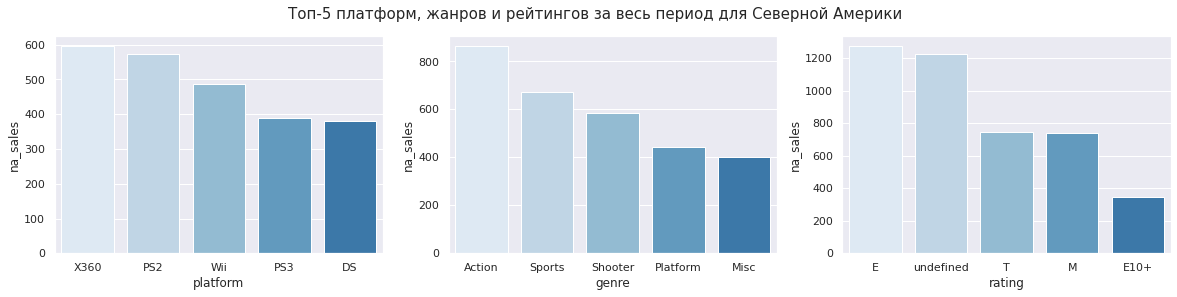

In [33]:
forpivot('na_sales','Топ-5 платформ, жанров и рейтингов за весь период для Северной Америки')

* Самые популярные платформы (топ-5) в Северной Америке за весь период: Xbox 360, PlayStation 2, Wii, PlayStation 3 и Nintendo DS.
* Самые популярные жанры (топ-5) в Северной Америке за весь период: action (экшен), sports (спортивные), shooter (шутер), platform (платформер) и misc (разное).
* В Северной Америке за весь период больше всего продаж у игр с рейтингом E («для всех»), затем по убыванию идут игры без рейтинга, Т («подросткам 13-19 лет»), M («от 17 лет») и E10+ («для всех старше 10 лет»).

**Выведем топ-5 платформ, жанров и рейтингов за актуальный период для Северной Америки**

  platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20



          genre  na_sales
0        Action    126.05
1       Shooter    109.74
2        Sports     65.27
3  Role-Playing     46.40
4          Misc     27.49



      rating  na_sales
0          M    165.21
1  undefined     89.42
2          E     79.05
3       E10+     54.24
4          T     49.79





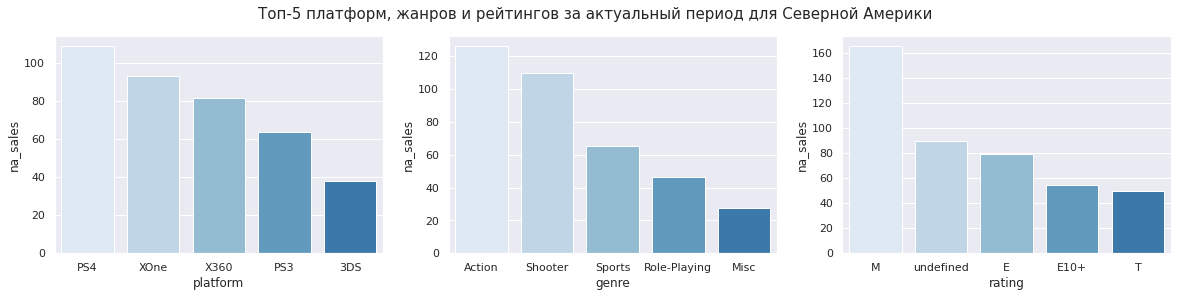

In [34]:
for_pivot_actual('na_sales','Топ-5 платформ, жанров и рейтингов за актуальный период для Северной Америки')

* Самые популярные платформы (топ-5) в Северной Америке за актуальный период: PlayStation 4, Xbox One, Xbox 360, PlayStation 3 и Nintendo 3DS.
* Самые популярные жанры (топ-5) в Северной Америке за актуальный период: action (экшен),  shooter (шутер), sports (спортивные),  role-playing (ролевая) и misc (разное).
* В Северной Америке за актуальный период больше всего продаж у игр с рейтингом M («от 17 лет»), затем идут игры без рейтинга, E («для всех»), затем по убыванию идет E10+ («для всех старше 10 лет») и Т («подросткам 13-19 лет»).

**Портрет пользователя для региона Европейский союз**

**Выведем топ-5 платформ, жанров и рейтингов за весь период для Европейского союза**

  platform  eu_sales
0      PS2    332.63
1      PS3    327.21
2     X360    268.32
3      Wii    258.32
4       PS    212.39



     genre  eu_sales
0   Action    510.99
1   Sports    371.33
2  Shooter    314.52
3   Racing    234.49
4     Misc    210.60



      rating  eu_sales
0          E    703.87
1  undefined    609.65
2          M    480.00
3          T    421.79
4       E10+    183.35





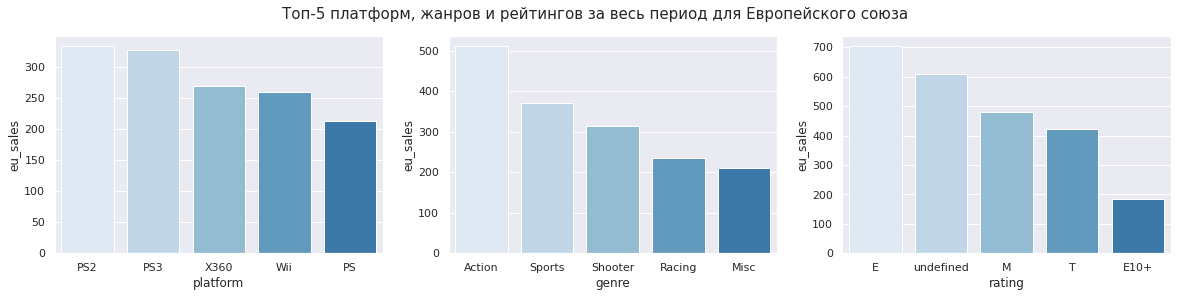

In [35]:
forpivot('eu_sales','Топ-5 платформ, жанров и рейтингов за весь период для Европейского союза')

* Самые популярные платформы (топ-5) в Европейском союзе за весь период: PlayStation 2, PlayStation 3, Xbox 360, Wii и PlayStation.
* Самые популярные жанры (топ-5) в Европейском союзе за весь период: action (экшен), sports (спортивные), shooter (шутер), racing (гонки) и misc (разное).
* В Европейском союзе за весь период больше всего продаж у игр с рейтингом E («для всех»), затем по убыванию идут игры без рейтинга, M («от 17 лет»), Т («подросткам 13-19 лет») и E10+ («для всех старше 10 лет»).

**Выведем топ-5 платформ, жанров и рейтингов за актуальный период для Европейского союза**

  platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96



          genre  eu_sales
0        Action    118.13
1       Shooter     87.86
2        Sports     60.52
3  Role-Playing     36.97
4        Racing     20.19



      rating  eu_sales
0          M    145.32
1          E     83.36
2  undefined     78.91
3       E10+     42.69
4          T     41.95





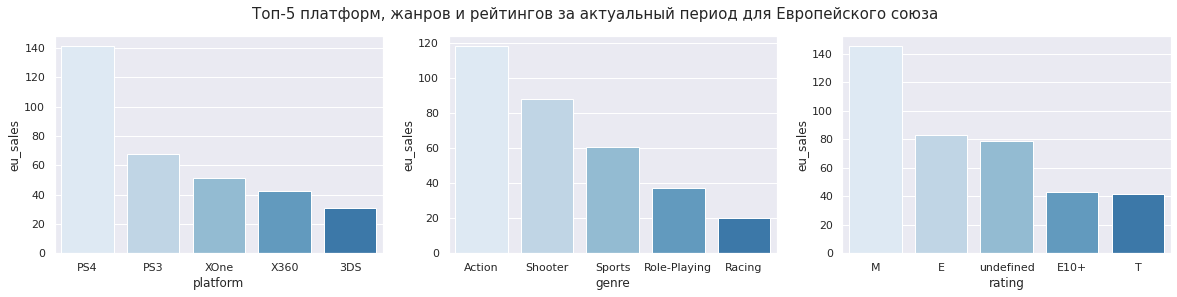

In [36]:
for_pivot_actual('eu_sales','Топ-5 платформ, жанров и рейтингов за актуальный период для Европейского союза')

* Самые популярные платформы (топ-5) в Европейском союзе за актуальный период: PlayStation 4, PlayStation 3, Xbox One, Xbox 360 и Nintendo 3DS.
* Самые популярные жанры (топ-5) в Европейском союзе за актуальный период: action (экшен), shooter (шутер), sports (спортивные), role-playing (ролевая) и racing (гонки).
* В Европейском союзе за актуальный период больше всего продаж у игр с рейтингом M («от 17 лет»), затем по убыванию идет E («для всех»), игры без рейтинга, E10+ («для всех старше 10 лет») и Т («подросткам 13-19 лет»).

**Портрет пользователя для региона Япония**

**Выведем топ-5 платформ, жанров и рейтингов за весь период для Японии**

  platform  jp_sales
0       DS    175.02
1       PS    139.78
2      PS2    137.54
3     SNES    116.55
4      3DS    100.62



          genre  jp_sales
0  Role-Playing    353.39
1        Action    160.14
2        Sports    134.93
3      Platform    130.71
4          Misc    107.02



      rating  jp_sales
0  undefined    836.74
1          E    197.96
2          T    150.70
3          M     63.58
4       E10+     40.20





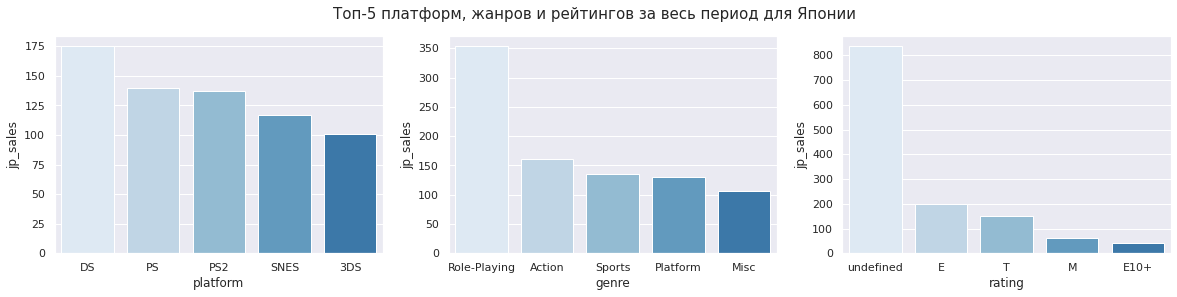

In [37]:
forpivot('jp_sales','Топ-5 платформ, жанров и рейтингов за весь период для Японии')

* Самые популярные платформы (топ-5) в Японии за весь период: Nintendo DS, PlayStation, PlayStation 2, Super Nintendo Entertainment System и Nintendo 3DS.
* Самые популярные жанры (топ-5) в Японии за весь период: role-playing (ролевая), action (экшен), sports (спортивные), platform (платформер) и misc (разное).
* В Японии за весь период больше всего продаж у игр без рейтинга, с рейтингом E («для всех»), затем по убыванию идет Т («подросткам 13-19 лет»), M («от 17 лет») и E10+ («для всех старше 10 лет»).

**Выведем топ-5 платформ, жанров и рейтингов за актуальный период для Японии**

  platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88



          genre  jp_sales
0  Role-Playing     51.04
1        Action     40.49
2          Misc      9.20
3      Fighting      7.65
4       Shooter      6.61



      rating  jp_sales
0  undefined     85.05
1          T     20.59
2          E     15.14
3          M     14.11
4       E10+      5.89





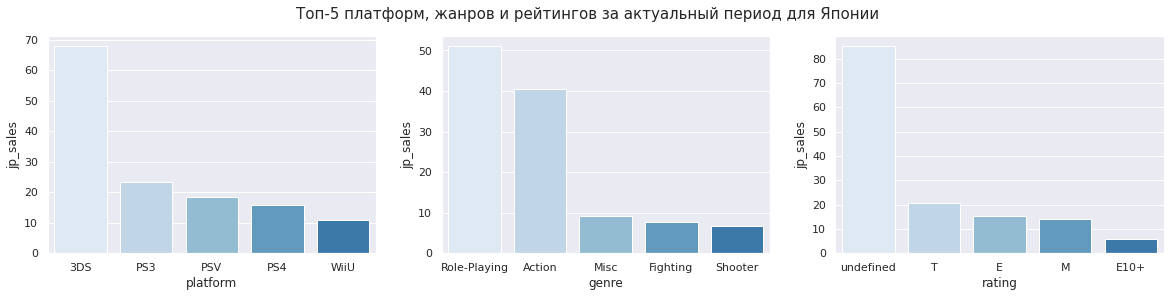

In [38]:
for_pivot_actual('jp_sales','Топ-5 платформ, жанров и рейтингов за актуальный период для Японии')

* Самые популярные платформы (топ-5) в Японии за актуальный период: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4 и Nintendo Wii U.
* Самые популярные жанры (топ-5) в Японии за актуальный период: role-playing (ролевая), action (экшен), misc (разное), fighting (бои) и shooter (шутер).
* В Японии за актуальный период больше всего продаж у игр без рейтинга, с рейтингом T («подросткам 13-19 лет»), затем по убыванию идет E («для всех»), M («от 17 лет»), E10+ («для всех старше 10 лет»).

**Вывод**
За период с 2013 по 2016 гг.

Для Северной Америки :
* Самые популярные платформы: PlayStation 4, Xbox One, Xbox 360, PlayStation 3 и  Nintendo 3DS.
* Самые популярные жанры: action (экшен),  shooter (шутер), sports (спортивные),  role-playing (ролевая) и misc (разное).
* В Северной Америке больше всего продаж у игр с рейтингом M («от 17 лет»), затем идут игры без рейтинга, E («для всех»), затем по убыванию идет E10+ («для всех старше 10 лет») и Т («подросткам 13-19 лет»).

Для Европейского Союза:
* Самые популярные платформы: PlayStation 4, PlayStation 3, Xbox One, Xbox 360 и Nintendo 3DS.
* Самые популярные жанры: action (экшен), shooter (шутер), sports (спортивные), role-playing (ролевая) и racing (гонки).
* В Европейском союзе больше всего продаж у игр с рейтингом M («от 17 лет»), затем по убыванию идет E («для всех»), игры без рейтинга, E10+ («для всех старше 10 лет») и Т («подросткам 13-19 лет»).

Для Японии:
* Самые популярные платформы: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4 и Nintendo Wii U.
* Самые популярные жанры: role-playing (ролевая), action (экшен), misc (разное), fighting (бои) и shooter (шутер).
* В Японии больше всего продаж у игр без рейтинга, с рейтингом T («подросткам 13-19 лет»), затем по убыванию идет E («для всех»), M («от 17 лет»), E10+ («для всех старше 10 лет»).


У каждого региона популярна "своя" платформа, при этом в Северной Америке и Европейском союзе наиболее популярна за актуальный для нас период PlayStation 4. В Японии ситуация другая, в большей степени там популярна Nintendo 3DS.

Опять же в таких регионах как Северная Америка и Европейский союз в актуальный для нас период были популярны такие жанры как: action (экшен), shooter (шутер), sports (спортивные). В Японии в это время популярны такие жанры как: role-playing (ролевая), action (экшен) и misc (разное).

В Северной Америке и Европейском союзе за актуальный период больше всего продаж у игр с рейтингом М («от 17 лет»), а также  E («для всех») и игры без рейтинга. В Японии больше всего продаются игры без рейтинга, с рейтингом T («подросткам 13-19 лет») и E («для всех»). Рейтинг влияет на продажи.

## Проверка гипотез

Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Сформулируем нулевую и альтернативную гипотезы:
* H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Критический уровень статистической значимости зададим равный 5%.

In [39]:
# сохраним в переменных xbox и pc актуальные данные
xone = data[(data['platform']=='XOne') & (data['year_of_release']>=2013)]['user_score']
pc = data[(data['platform']=='PC') & (data['year_of_release']>=2013)]['user_score']

# посчитаем средний рейтинг пользователя для PC
#pc.mean()
# посчитаем средний рейтинг пользователя для Xbox One
#xone.mean()

# выполним проверку гипотезы, используя метод ttest_ind
alpha = 0.05 # критический уровень статистической значимости
             # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. То есть средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Проверим гипотезу: средние пользовательские рейтинги жанров action (экшен) и sports (спортивные) разные.**

Сформулируем нулевую и альтернативную гипотезы:
* H₀: Средние пользовательские рейтинги жанров action и sports одинаковые.
* H₁: Средние пользовательские рейтинги жанров action и sports различаются.

Критический уровень статистической значимости зададим равный 5%.

In [40]:
# сохраним в переменных genre_action и genre_sports актуальные данные с пользовательскими оценками
genre_action = data[(data['genre']=='Action') & (data['year_of_release']>=2013)]['user_score']
genre_sports = data[(data['genre']=='Sports') & (data['year_of_release']>=2013)]['user_score']

# посмотрим среднюю оценку по жанру action
#genre_action.mean()
# посмотрим среднюю оценку по жанру sports
#genre_sports.mean()

# для проверки гипотезы тиакже будем использовать метод ttest_ind

alpha = 0.05 # критический уровень статистической значимости
             # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. То есть средние пользовательские рейтинги жанров action и sports различаются.

**Вывод**

В результате проверки гипотез мы убедились, что:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров action и sports различаются.

## Общий вывод

**В ходе исследования мы получили следующие результаты:**

1. Самыми перспективными платформами пока можно назвать: PlayStation 4, Xbox One и Nintendo 3DS.


2. Самыми популярными жанрами были
* В Северной Америке: action (экшен), shooter (шутер), sports (спортивные), role-playing (ролевая) и misc (разное);
* В Европейском союзе: action (экшен), shooter (шутер), sports (спортивные), role-Playing (ролевая) и racing (гонки);
* В Японии: role-playing (ролевая), action (экшен), misc (разное), fighting (бои), shooter (шутер).

3. Самыми популярными платформами были
* В Северной Америке: PlayStation 4, Xbox One, Xbox 360, PlayStation 3 и Nintendo 3DS.
* В Европейском союзе: PlayStation 4, PlayStation 3, Xbox One, Xbox 360 и Nintendo 3DS.
* В Японии: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4 и Nintendo Wii U.

4. Больше всего продаж у игр с рейтингами
* В Северной Америке: с рейтингом M («от 17 лет»), затем идут игры без рейтинга, E («для всех»), E10+ («для всех старше 10 лет») и Т («подросткам 13-19 лет»);
* В Европейском союзе: с рейтингом M («от 17 лет»), затем по убыванию идет E («для всех»), игры без рейтинга, E10+ («для всех старше 10 лет») и Т («подросткам 13-19 лет»);
* В Японии: с рейтингом T («подросткам 13-19 лет»), затем по убыванию идет E («для всех»), M («от 17 лет»), E10+ («для всех старше 10 лет»).

5. Кроме того, мы проверили гипотезы и получили, что (при  уровне статистической значимости в 5%):
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* средние пользовательские рейтинги жанров action и sports различаются.

**Таким образом,**
основываясь на всем выше перечисленном делаем вывод, что игра имеет больше шансов на успех у пользователей в Северной Америке и Европейском союзе, если она вышла на PlayStation 4, относится к жанру action (экшен) и имеет рейтинг M («от 17 лет»). В Японии, если она вышла на Nintendo 3DS, относится к жанру role-playing (ролевая) и имеет рейтинг T («подросткам 13-19 лет»). При планировании рекламной компании на 2017 год в большей степени проще ориентироваться на регины Северной Америки и Европейского союза, потому что предпочтения их потребителей схожи. При этом для определения прибыльной игры следует также учитывать высокие отзывы критиков.